In [1]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

from scipy.stats import zscore
from matplotlib import pyplot as plt
from seaborn import pairplot, boxplot, heatmap

import warnings
from math import sqrt
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
columns = boston.feature_names
target_name = ['MEDV'] #MEDV Median value of owner-occupied homes in $1000’s

In [3]:
df = pd.DataFrame(data, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_full = df.copy()
df_full['MEDV'] = target
df_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


    CRIM per capita crime rate by town
    ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS proportion of non-retail business acres per town
    CHAS Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX nitric oxides concentration (parts per 10 million)
    RM average number of rooms per dwelling
    AGE proportion of owner-occupied units built prior to 1940
    DIS weighted distances to five Boston employment centres
    RAD index of accessibility to radial highways
    TAX full-value property-tax rate per $10,000

    PTRATIO pupil-teacher ratio by town
    B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT % lower status of the population

## Checking For Missing Values

In [6]:
df.isnull().any() # there are not any missing values

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

## Checking For Outliers

In [7]:
print(df[np.abs(zscore(df)< 3).all(axis=1)].shape)
print(df_full[np.abs(zscore(df_full)< 3).all(axis=1)].shape)

# DataFrame with original values but has had the outliers removed
no_out_df = df_full[np.abs(zscore(df_full)< 3).all(axis=1)]
print(df.shape[0] - 439)

(439, 13)
(439, 14)
67


There are 67 rows that contain outliers.

## Standard Scaling (to test models for which it is needed)

In [8]:
std_scaler = StandardScaler()
df_scaled = pd.DataFrame(std_scaler.fit_transform(df), columns=columns)

In [9]:
df_scaled['MEDV'] = target
print(df_scaled.shape)
df_scaled.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [10]:
# DataFrame that has been scaled and has the outliers removed.
df_scaled_no_out = df_scaled[np.abs(zscore(df_scaled)< 3).all(axis=1)]
print(df_scaled_no_out.shape)
# df_scaled_no_out.head()

(439, 14)


## Checking Correlations With Value

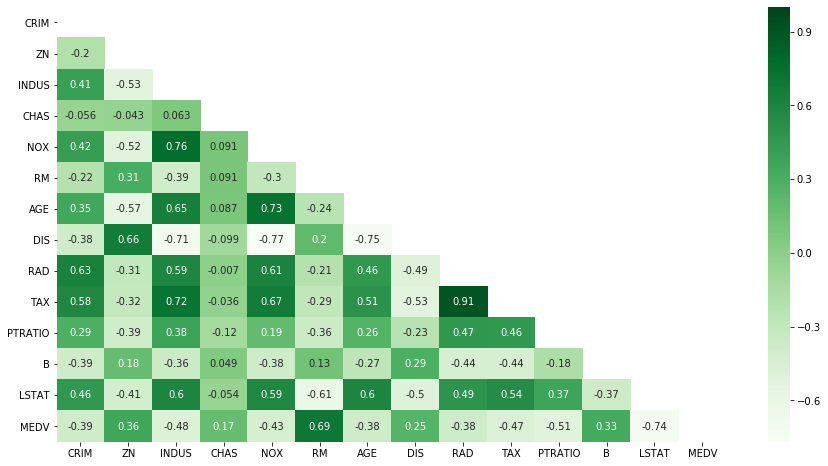

In [11]:
plt.figure(figsize=(15,8))

# Generate a mask for the upper triangle
mask = np.zeros_like(df_full.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap(df_full.corr().round(3), mask=mask, annot=True, cmap='Greens');

* Looking at the bottom row, one can view the correlations to the Median values.
Five have a positive correlation while eight have a negative correlation. 

* To get a better understanding of how strong each correlation is relative to the other correlations, the absolute value can help.

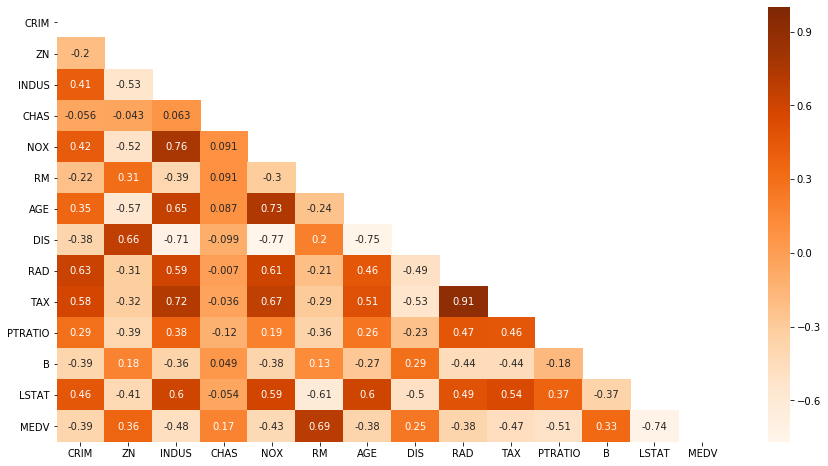

In [12]:
# Double checking the scaled values to make sure everything is ok. (Values should be the same as unscaled)
plt.figure(figsize=(15,8))
heatmap(df_scaled.corr().round(3), mask=mask, annot=True, cmap='Oranges');

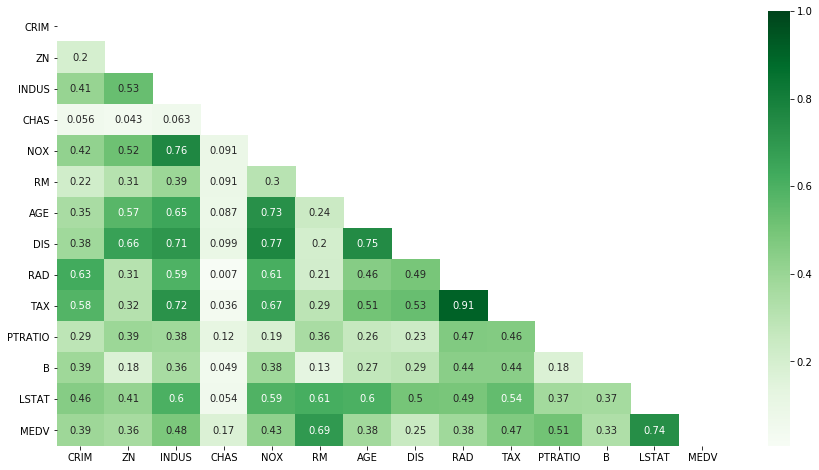

In [13]:
# Absolute value correlation plot
plt.figure(figsize=(15,8))
heatmap(df_full.corr().abs().round(3), mask=mask, annot=True, cmap='Greens');

In [14]:
# Raw correlations
sorted(zip(df_full.corr().round(3)['MEDV'].keys(), 
           df_full.corr().round(3)['MEDV']), 
           key=lambda x: x[1])[:-1]

[('LSTAT', -0.738),
 ('PTRATIO', -0.508),
 ('INDUS', -0.484),
 ('TAX', -0.469),
 ('NOX', -0.427),
 ('CRIM', -0.388),
 ('RAD', -0.382),
 ('AGE', -0.377),
 ('CHAS', 0.175),
 ('DIS', 0.25),
 ('B', 0.333),
 ('ZN', 0.36),
 ('RM', 0.695)]

In [15]:
# Absolute value of correlations; give insight to how strong a value is with regards to MEDV
sorted(zip(df_full.corr().abs().round(3)['MEDV'].keys(), 
           df_full.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[1:]

[('LSTAT', 0.738),
 ('RM', 0.695),
 ('PTRATIO', 0.508),
 ('INDUS', 0.484),
 ('TAX', 0.469),
 ('NOX', 0.427),
 ('CRIM', 0.388),
 ('RAD', 0.382),
 ('AGE', 0.377),
 ('ZN', 0.36),
 ('B', 0.333),
 ('DIS', 0.25),
 ('CHAS', 0.175)]

The five weakest corrlations are CHAS, DIS, B, ZN, and AGE. This is important to keep an eye on if features need to be reduced.

There is a particularly strong correlation between RAD and TAX. 

Finally, DIS has a strong negative correlation to INDUS, NOX, and AGE.

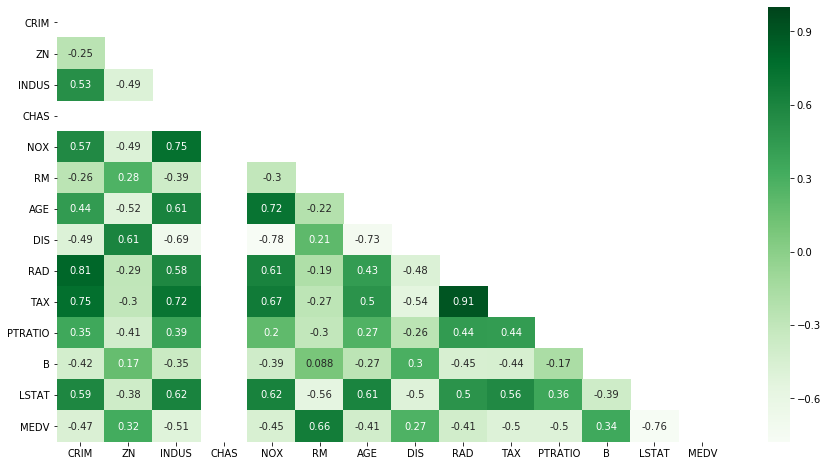

In [16]:
plt.figure(figsize=(15,8))
heatmap(no_out_df.corr().round(3), mask=mask, annot=True, cmap='Greens');

In [17]:
sorted(zip(df_full.corr().abs().round(3)['MEDV'].keys(), 
           df_full.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[1:]

[('LSTAT', 0.738),
 ('RM', 0.695),
 ('PTRATIO', 0.508),
 ('INDUS', 0.484),
 ('TAX', 0.469),
 ('NOX', 0.427),
 ('CRIM', 0.388),
 ('RAD', 0.382),
 ('AGE', 0.377),
 ('ZN', 0.36),
 ('B', 0.333),
 ('DIS', 0.25),
 ('CHAS', 0.175)]

In [18]:
sorted(zip(no_out_df.corr().abs().round(3)['MEDV'].keys(), 
           no_out_df.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[2:]

[('LSTAT', 0.757),
 ('RM', 0.657),
 ('INDUS', 0.513),
 ('TAX', 0.497),
 ('PTRATIO', 0.496),
 ('CRIM', 0.469),
 ('NOX', 0.452),
 ('AGE', 0.406),
 ('RAD', 0.406),
 ('B', 0.344),
 ('ZN', 0.32),
 ('DIS', 0.273)]

After removing the outliers, the top correlated features remained the same; albeit in a slightly different order.

A bit of visualization for emphasis.

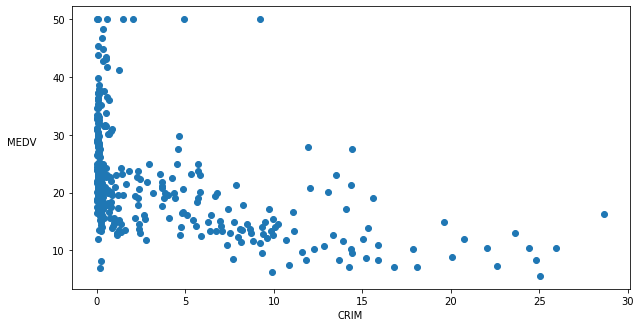

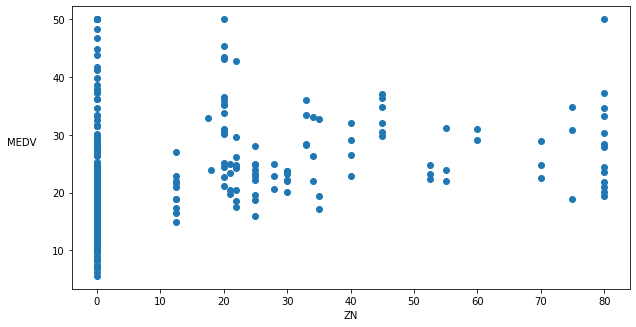

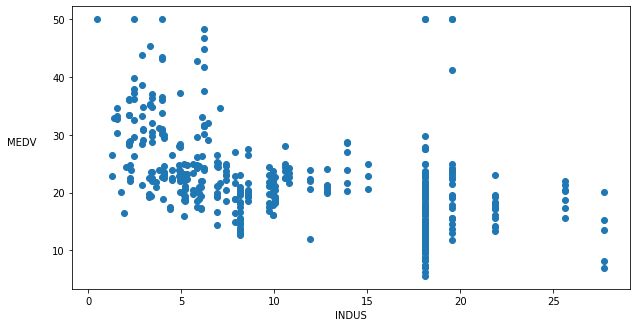

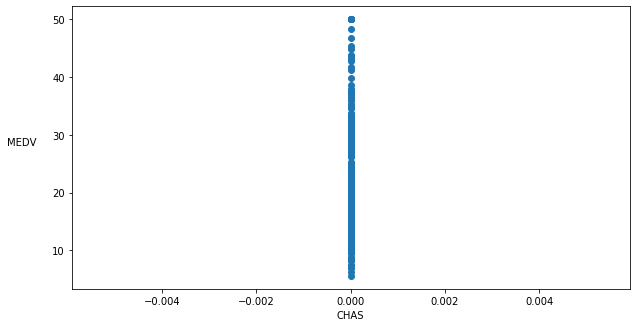

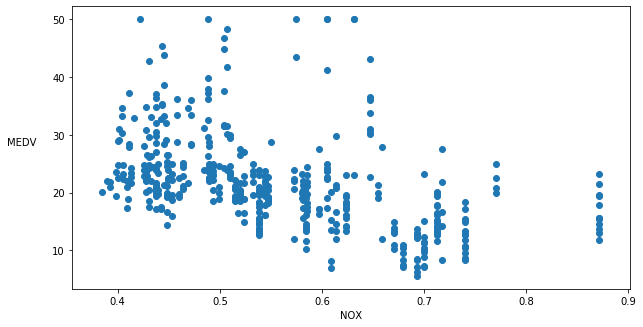

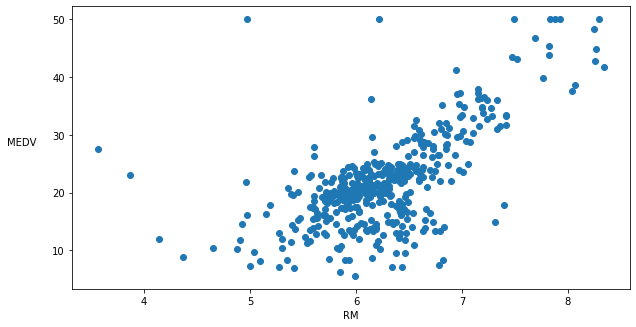

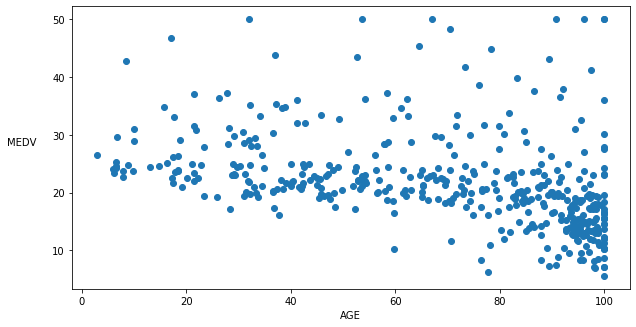

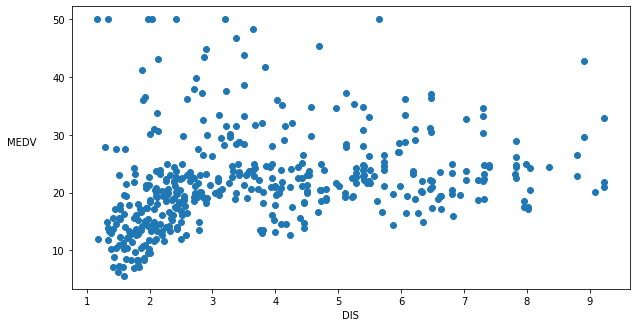

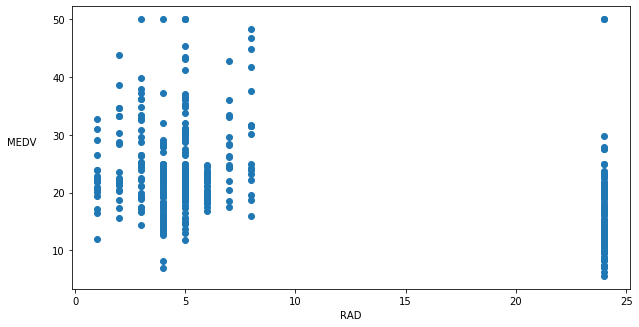

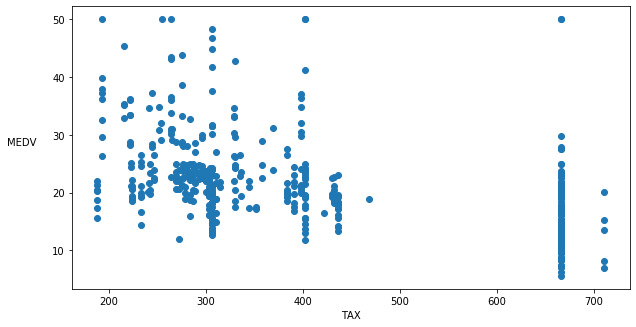

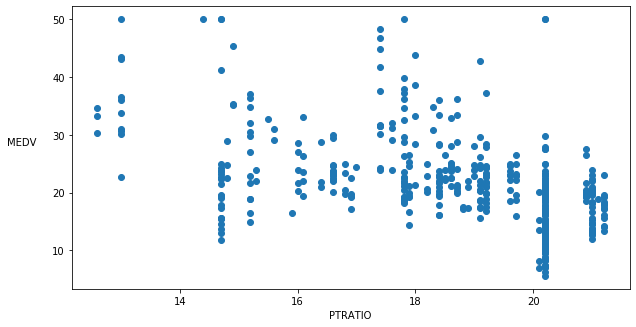

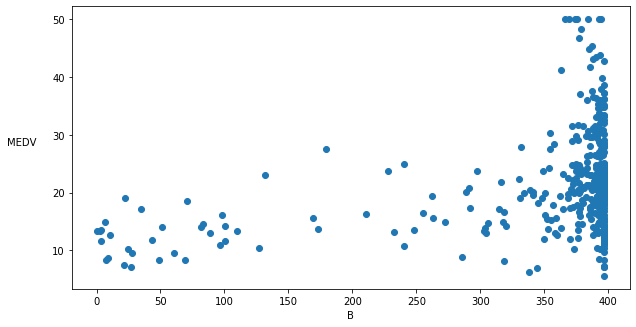

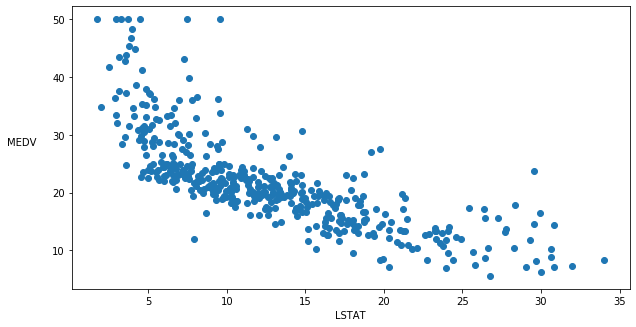

In [19]:
for idx, i in enumerate(columns):
    plt.figure(figsize=(10, 80))
    plt.subplot(len(columns), 1, idx+1)
    plt.ylabel('MEDV', rotation=0, labelpad=30)
    plt.xlabel(i)
    plt.scatter(no_out_df[str(i)], no_out_df['MEDV']);

## Modeling

### Dummy Classifier

In [20]:
X = no_out_df.drop('MEDV', axis=1)
y = no_out_df['MEDV']

In [21]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr_scores = cross_val_score(dr, X, y, cv=10, scoring='neg_mean_squared_error')

In [22]:
round(np.mean(np.sqrt(-dr_scores)), 3)

7.921

A low bar is set.

### Random Forest

First model to create is a random forest. Feature scaling is not required for a random forest, therefore I will use the unscaled dataframe with outliers removed.

In [23]:
print(X.shape, y.shape)

(439, 13) (439,)


In [24]:
rf = RandomForestRegressor(random_state=50)
rf_mse_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rf_mae_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_absolute_error')
rf_r2_scores = cross_val_score(rf, X, y, cv=10, scoring='r2')

In [25]:
n = no_out_df.shape[0]
p = no_out_df.shape[1]-1
adj_r2 = lambda r2: 1-(((1-r2)*(n-1))/(n-p-1))
# rf_adj_r2 = 1-(1-np.mean(rf_r2_scores))*(n-1)/(n-p-1)

In [26]:
np.mean(rf_r2_scores)

0.4714838117945295

In [27]:
rf_adj_r2 = np.mean(list(map(adj_r2, rf_r2_scores)))

In [28]:
print(f'Random Forest Root Mean Squared Error: {np.mean(np.sqrt(-rf_mse_scores))}')
print(f'Random Forest Root Mean Absolute Error: {np.mean(-rf_mae_scores)}')
print(f'Random Forest Adjusted R^2: {rf_adj_r2}')

Random Forest Root Mean Squared Error: 3.7965604236397703
Random Forest Root Mean Absolute Error: 2.815588266384778
Random Forest Adjusted R^2: 0.45531743427295035


In [29]:
rf.fit(X, y)
sorted(zip(columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)

[('LSTAT', 0.4655670772820876),
 ('RM', 0.3573690710061398),
 ('DIS', 0.04651001780592091),
 ('CRIM', 0.03839475869437631),
 ('AGE', 0.01715580229063109),
 ('INDUS', 0.016302201117267927),
 ('TAX', 0.016267810087184347),
 ('PTRATIO', 0.013998226099000066),
 ('B', 0.012788180398841425),
 ('NOX', 0.010987557657726394),
 ('RAD', 0.0026640142560389016),
 ('ZN', 0.0019952833047851446),
 ('CHAS', 0.0)]

### K Nearest Neighbors

In [30]:
X = df_scaled_no_out.drop('MEDV', axis=1)
y = df_scaled_no_out['MEDV']

In [31]:
print(X.shape, y.shape)
df_scaled_no_out.head()

(439, 13) (439,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [32]:
k_rmse_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_rmse_scores.append(np.mean(np.sqrt(-scores)))
    
k_mae_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_absolute_error')
    k_mae_scores.append(np.mean(-scores))
    
k_r2_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10,)
    k_r2_scores.append(np.mean(scores))

In [33]:
k_adj_r2_scores = list(map(adj_r2, k_r2_scores))

In [34]:
print(np.mean(k_rmse_scores))
print(np.mean(k_mae_scores))
print(np.mean(k_adj_r2_scores))

4.570599235223618
3.3918507085784952
0.3500590964792981


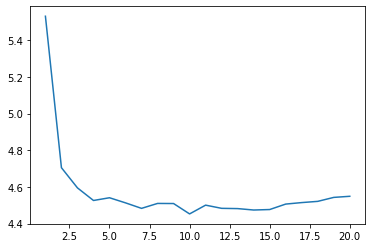

In [35]:
plt.plot(range(1, 21), k_rmse_scores)
plt.show();

In [36]:
print(f'KNN Value: {k_rmse_scores.index(min(k_rmse_scores))+1}')
print(f'KNN RMSE: {round(min(k_rmse_scores), 3)}')

KNN Value: 10
KNN RMSE: 4.453


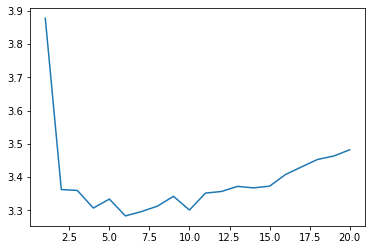

In [37]:
plt.plot(range(1, 21), k_mae_scores)
plt.show();

In [38]:
print(f'KNN Value: {k_mae_scores.index(min(k_mae_scores))+1}')
print(f'KNN MAE: {round(min(k_mae_scores), 3)}')

KNN Value: 6
KNN MAE: 3.283


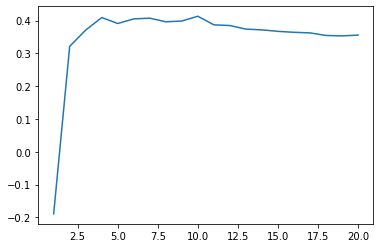

In [39]:
plt.plot(range(1, 21), k_adj_r2_scores)
plt.show();

In [40]:
print(f'KNN Value: {k_adj_r2_scores.index(max(k_adj_r2_scores))+1}')
print(f'KNN Adjusted R^2: {round(max(k_adj_r2_scores), 3)}')

KNN Value: 10
KNN Adjusted R^2: 0.413


## Top Three features only

In [41]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [42]:
sorted(zip(no_out_df.corr().abs().round(3)['MEDV'].keys(), 
           no_out_df.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[5:]

[('TAX', 0.497),
 ('PTRATIO', 0.496),
 ('CRIM', 0.469),
 ('NOX', 0.452),
 ('AGE', 0.406),
 ('RAD', 0.406),
 ('B', 0.344),
 ('ZN', 0.32),
 ('DIS', 0.273)]

In [43]:
t_f = sorted(zip(no_out_df.corr().abs().round(3)['MEDV'].keys(), 
           no_out_df.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[2:5]

b_f = sorted(zip(no_out_df.corr().abs().round(3)['MEDV'].keys(), 
           no_out_df.corr().abs().round(3)['MEDV']), 
           key=lambda x: x[1], reverse=True)[5:]

In [44]:
top_features = [k for k, v in t_f]
top_features

['LSTAT', 'RM', 'INDUS']

In [45]:
bottom_features = [k for k, v in b_f]
bottom_features.append('MEDV')
bottom_features.append('CHAS')
print(bottom_features)

['TAX', 'PTRATIO', 'CRIM', 'NOX', 'AGE', 'RAD', 'B', 'ZN', 'DIS', 'MEDV', 'CHAS']


In [46]:
X = no_out_df.drop(columns=bottom_features)
y = no_out_df['MEDV']

### Random Forest With Only Top 3

In [47]:
rf = RandomForestRegressor(random_state=50)
rf_mse_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rf_mae_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_absolute_error')
rf_r2_scores = cross_val_score(rf, X, y, cv=10, scoring='r2')

In [48]:
# n = no_out_df.shape[0]
# p = no_out_df.shape[1]-1
# rf_adj_r2 = 1-(1-np.mean(rf_r2_scores))*(n-1)/(n-p-1)

In [49]:
rf_adj_r2_scores = list(map(adj_r2, rf_r2_scores))
rf_adj_r2_scores = np.mean(rf_adj_r2_scores)

In [50]:
print(f'Random Forest Root Mean Squared Error: {np.mean(np.sqrt(-rf_mse_scores))}')
print(f'Random Forest Root Mean Absolute Error: {np.mean(-rf_mae_scores)}')
print(f'Random Forest Adjusted R^2: {rf_adj_r2_scores}')

Random Forest Root Mean Squared Error: 4.119528608465167
Random Forest Root Mean Absolute Error: 3.032187103594081
Random Forest Adjusted R^2: 0.34178712260535393


### KNN With Only Top 3

In [51]:
k_rmse_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_rmse_scores.append(np.mean(np.sqrt(-scores)))
    
k_mae_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_absolute_error')
    k_mae_scores.append(np.mean(-scores))
    
k_r2_scores = list()
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10,)
    k_r2_scores.append(np.mean(scores))

In [52]:
k_adj_r2_scores = list(map(adj_r2, k_r2_scores))

In [53]:
print(np.mean(k_rmse_scores))
print(np.mean(k_mae_scores))
print(np.mean(k_adj_r2_scores))

4.736530169113054
3.5106461039082553
0.28892258366461576


In [54]:
print(f'KNN Value: {k_adj_r2_scores.index(max(k_adj_r2_scores))+1}')
print(f'KNN Adjusted R^2: {round(max(k_adj_r2_scores), 3)}')

KNN Value: 9
KNN Adjusted R^2: 0.337


## Best Results

Random Forest RMSE: 3.7965604236397703

Random Forest Root MAE: 2.815588266384778

Random Forest Adjusted R^2: 0.45531743427295035

KNN RMSE (10 Neighbors): 4.453 

KNN MAE (6 Neighbors): 3.283

KNN Adjusted R^2 (10 Neighbors): 0.413

A random forest regressor provided the better results.